In [1]:
import numpy as np
import matplotlib.pyplot as plt

from createData import createDataLinear, createDataCircular
from feedforward import FeedForwardNN, BCELoss

np.set_printoptions(precision = 4, suppress = True)

# This pipeline is a showcase of the feedforward neural network I implemented from scratch in the feedforward.py file

Data: [x, y, label]
 [[ 0.716  -0.2392  0.    ]
 [ 0.2803 -0.2416  0.    ]
 [ 0.0723 -0.422   0.    ]
 [ 0.0359 -0.1324  0.    ]
 [-0.4962  0.0939  1.    ]]


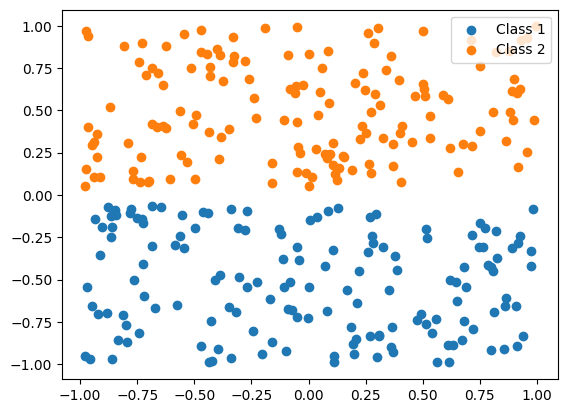

Data: [x, y, label]
 [[-0.9731  0.2167  0.    ]
 [-0.1148  0.0113  1.    ]
 [-0.2936 -0.0223  1.    ]
 [-0.8063 -0.1249  0.    ]
 [ 0.0776 -0.6917  0.    ]]


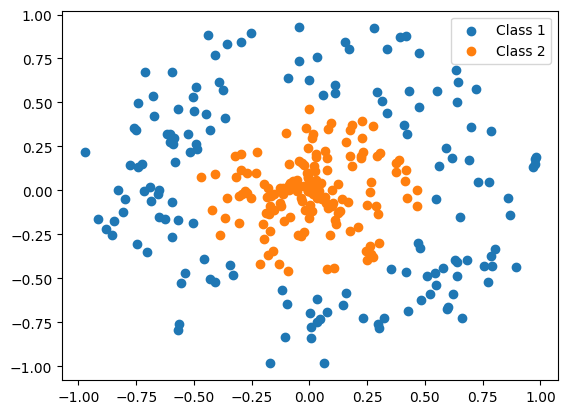

In [2]:
# linear seperable
data_linear = createDataLinear(150, 150)
print("Data: [x, y, label]\n", data_linear[0:5])

# divide into classes
class1_linear = data_linear[np.where(data_linear[:,2] == 0)]
class2_linear = data_linear[np.where(data_linear[:,2] == 1)]

plt.scatter(class1_linear[:,0], class1_linear[:,1], label="Class 1")
plt.scatter(class2_linear[:,0], class2_linear[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

# not linear seperable
data_circular = createDataCircular(150, 150)
print("Data: [x, y, label]\n", data_circular[0:5])

# divide into classes
class1_circular = data_circular[np.where(data_circular[:,2] == 0)]
class2_circular = data_circular[np.where(data_circular[:,2] == 1)]

plt.scatter(class1_circular[:,0], class1_circular[:,1], label="Class 1")
plt.scatter(class2_circular[:,0], class2_circular[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

### Create neural network

In [3]:
# First network, used on the linear data
nn_lin = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 2, hidden_units = [3, 3], activation = "relu", output_activation = "sigmoid")
weights = nn_lin.weights()
print("First network weights, used on the linear data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

# Second network, used on the circular data
nn_circ = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 3, hidden_units = [10, 10, 10], activation = "relu", output_activation = "sigmoid")
weights = nn_circ.weights()
print("\nSecond network weights, used on the circular data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

First network weights, used on the linear data:
(3, 2)
[[ 0.492   0.558 ]
 [ 0.3903 -0.6137]
 [ 0.0373  0.1938]]
(3, 3)
[[ 0.4867 -0.4875  0.178 ]
 [-0.3049  0.0597  0.0072]
 [-0.1055 -0.4302 -0.4866]]
(1, 3)
[[-0.2214  0.1793 -0.2556]]

Second network weights, used on the circular data:
(10, 2)
[[ 0.4604  0.5242]
 [ 0.5174 -0.1645]
 [ 0.4105  0.0209]
 [ 0.4456 -0.1495]
 [-0.1211 -0.3387]
 [-0.2081  0.0757]
 [ 0.1978  0.6796]
 [-0.2834  0.4776]
 [-0.4386 -0.0154]
 [ 0.5151  0.4326]]
(10, 10)
[[ 0.3125 -0.2952  0.1672  0.0145  0.2089 -0.2697 -0.3083  0.2029 -0.1085
  -0.2002]
 [-0.1875 -0.2773  0.0982  0.0812 -0.184  -0.205   0.1233  0.1355  0.245
  -0.3136]
 [-0.2056  0.1811 -0.1619  0.2147  0.2787 -0.1676  0.1836 -0.1981  0.2088
  -0.2263]
 [ 0.1137  0.2583 -0.2393 -0.2331  0.2988 -0.0745  0.0159 -0.2592 -0.1287
   0.2317]
 [-0.299   0.077   0.2973  0.0918 -0.2983  0.015  -0.2833 -0.2097 -0.2334
   0.0182]
 [ 0.0984 -0.1739 -0.1022  0.2527 -0.0352 -0.2986  0.1169  0.0211  0.3075
  -0.

### Quick forward call

In [18]:
input = data_linear[0][0:2]
print("Input:", input, "- Label:", data_linear[0][2])
output = nn_lin.forward(input)
print("Model output:", output[0])
loss = BCELoss(output[0], 1)
print("BCEloss gives:", loss)

Input: [ 0.716  -0.2392] - Label: 0.0


NameError: name 'nn_lin' is not defined

### Train network on the two classes

In [5]:
# FOR LINEAR DATA
nr_epochs = 15
learning_rate = 0.01
running_loss = 0
loss_linear = []

# training loop
for epoch in range(nr_epochs):
    for i in range(data_linear.shape[0]):
        # input
        input = data_linear[i][0:2]
        label = data_linear[i][2]
        
        # forward
        output = nn_lin.forward(input)[0]
        # loss calc
        current_loss = BCELoss(output, label)
        # backprop
        nn_lin.backprop(input, output, label, "BCELoss")
        # take a step down the gradient, gradients are reset after
        nn_lin.step(learning_rate)

        # add loss to running loss
        running_loss += current_loss

    # calc loss, reset running loss
    loss_linear.append(running_loss / data_linear.shape[0])
    running_loss = 0

# FOR CIRCULAR DATA
nr_epochs = 50
learning_rate = 0.01
running_loss = 0
loss_circular = []

# training loop
for epoch in range(nr_epochs):
    for j in range(data_circular.shape[0]):
        # input
        input = data_circular[i][0:2]
        label = data_circular[i][2]
        
        # forward
        output = nn_circ.forward(input)[0]
        # loss calc
        current_loss = BCELoss(output, label)
        # backprop
        nn_circ.backprop(input, output, label, "BCELoss")
        # take a step down the gradient, gradients are reset after
        nn_circ.step(learning_rate)

        # add loss to running loss
        running_loss += current_loss

    # calc loss, reset running loss
    loss_circular.append(running_loss / data_circular.shape[0])
    running_loss = 0

/home/hkolstee/projects/FeedforwardNN_from_scratch/feedforward.py:54: RuntimeWarning: divide by zero encountered in log
  return (-target * np.log(output) - (1 - target) * np.log(1 - output))
/home/hkolstee/projects/FeedforwardNN_from_scratch/feedforward.py:54: RuntimeWarning: invalid value encountered in scalar multiply
  return (-target * np.log(output) - (1 - target) * np.log(1 - output))
/home/hkolstee/projects/FeedforwardNN_from_scratch/feedforward.py:57: RuntimeWarning: invalid value encountered in scalar divide
  return (-target / output) + ((1 - target) / (1 - output))
/home/hkolstee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2412: RuntimeWarning: invalid value encountered in relu (vectorized)
  outputs = ufunc(*inputs)
/home/hkolstee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2412: RuntimeWarning: invalid value encountered in relu_deriv (vectorized)
  outputs = ufunc(*inputs)


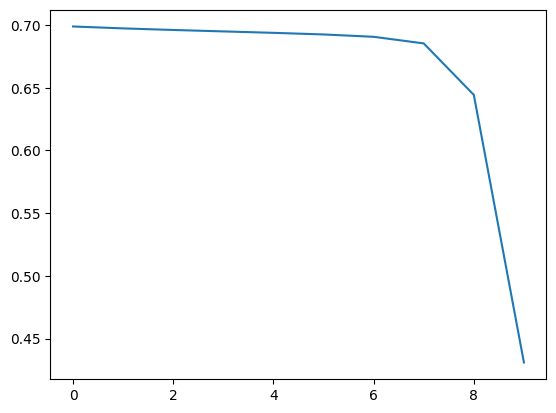

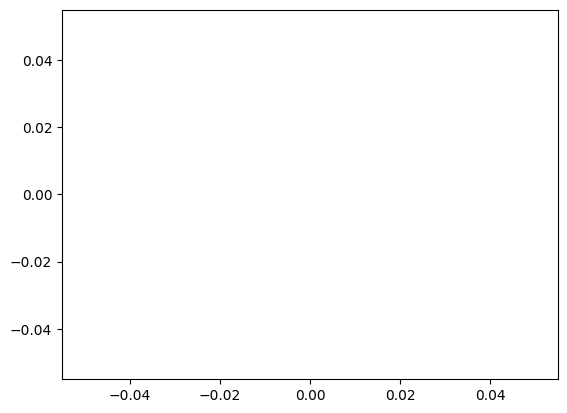

In [6]:
plt.plot(loss_linear)
plt.show()

plt.plot(loss_circular)
plt.show()

### Decision boundary

(400, 2)
[[-1.  -1. ]
 [-0.9 -1. ]
 [-0.8 -1. ]
 [-0.7 -1. ]
 [-0.6 -1. ]
 [-0.5 -1. ]
 [-0.4 -1. ]
 [-0.3 -1. ]
 [-0.2 -1. ]
 [-0.1 -1. ]]
[[nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan]

/home/hkolstee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2412: RuntimeWarning: invalid value encountered in relu (vectorized)
  outputs = ufunc(*inputs)
/home/hkolstee/.local/lib/python3.8/site-packages/matplotlib/contour.py:1479: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/hkolstee/.local/lib/python3.8/site-packages/matplotlib/contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


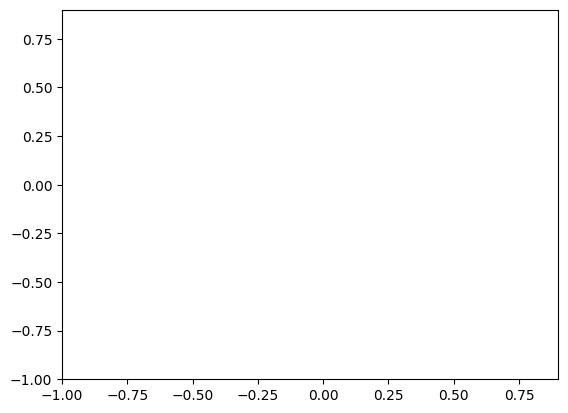

In [17]:
# define x and y scale
x1grid = np.arange(-1, 1, 0.1)
x2grid = np.arange(-1, 1, 0.1)

# create grid lines 
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

print(grid.shape)
print(grid[0:10])

# make predictions for the grid
preds = []
for i in range(grid.shape[0]):
    pred = nn_linear.forward(grid[i]) 
    preds.append(pred)
print(preds)

# reshape the predictions back into a grid
preds = np.array(preds)
zz = preds.reshape(xx.shape)

print(zz)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')